# Demo API workflow

This demo demonstrates how to access Viable Pathway forecasts with an API call. 

*Run this initial setup first*

In [217]:
# Imports and utility functions
import requests
import json
from typing import Dict, Any, Optional

HOST = "https://app.test.viablepathway.net"
#HOST = "http://localhost:3003"

def call_api(url, data={}, method="POST"):
    try:
        # Make the API request
        response = requests.request(
            method=method,
            url=f"{HOST}{url}",
            headers={'Content-Type': 'application/json'},
            json=None if method == "GET" else data,  # Automatically converts dict to JSON
        )
        
        # Raise an exception for bad status codes
        response.raise_for_status()
       
        # Parse and return JSON response
        return response.json()
        
    except requests.exceptions.RequestException as e:
        print(f"API request failed: {e}")
        raise
    except json.JSONDecodeError as e:
        print(f"Failed to parse JSON response: {e}")
        raise ValueError("Invalid JSON response")

## Step 0: Request template API structure

This empty template document contains the essential datafields and structure to send your payload.  

Essential elements:
- desiredGrowth (in % e.g. 3), baseYear (max 2024), location (e.g. Australia), activitydata (see Step 1 for more info)  

Optional elements:  
- companytype, netzeroYear, locationstate, electricityapproach (location vs market), revenue (in million AUD), employees (in FTE), workdaysperyear  
- neartermSBTiTarget (for scope 3: either 1.5 or WB2), neartermtargetYear (SBTi guidance is 5 to 10 years from baseYear)  
- userdefinedneartermTarget (in % from baseYear e.g. 50), userdefinedneartermTargetYear (e.g. 2030)   
- userdefinednetzeroTarget (in % from baseYear e.g. 90), userdefinednetzeroTargetYear (e.g. 2050), userdefinedtargetBaseYear (e.g. 2022)  
- userdefinedinternalactions (optional)
- historical emission data if target base years is not latest year



In [218]:
result = call_api("/api/data/template", method="GET")
print(f"Template:\n{json.dumps(result, indent=2)}")

Template:
{
  "organisationid": "e.g. ACME",
  "desiredGrowth": 3,
  "baseYear": 2024,
  "country": "australia",
  "region": "aus-nsw",
  "activitydata": {
    "primary": {
      "secondary_tertiary": {
        "activityuom": "",
        "activitydatavalue": 0,
        "activitydatatype": "mass",
        "emissionfactorunit": "kgCO2e",
        "emissionfactorname": "",
        "emissionfactorvalue": 0,
        "emissionfactorsource": "",
        "description": "",
        "ghgpscope": "1",
        "ghgpscopecategory": "1-1"
      }
    }
  },
  "netzeroYear": 2050,
  "industrytype": "advertising, marketing & pr",
  "companytype": "office",
  "electricityapproach": "location",
  "revenue": 2400,
  "currency": "aud",
  "employees": 4300,
  "workdaysperyear": 245,
  "neartermSBTiTarget": "WB2",
  "neartermSBTiTargetYear": 2030,
  "neartermSBTiTargetBaseYear": 2020,
  "userdefinedneartermTarget": -50,
  "userdefinedneartermTargetYear": 2030,
  "userdefinednetzeroTarget": -90,
  "userdefine

## Step 1a: Request Viable Pathway action name standards


Use these endpoints to access the standards names used within the Viable Pathway (VP) calculation.    
*Note: all lower-case names*

### Request standard activity names

Use this endpoint to access all the activity data names used within the calculation.    
  
*If your activity names do not match VP names, the activity's emissions and growth will still be estimated, but any external trends in our database will not be applied.*

In [219]:
result = call_api("/api/data/standardnames", method="GET")
print(f"activity:\n{json.dumps(result['activity'], indent=2)}")

activity:
[
  "commuting_publictransport_bus",
  "commuting_publictransport_train",
  "commuting_publictransport_metro",
  "commuting_publictransport_ferry",
  "commuting_car_bev",
  "commuting_car_phev",
  "commuting_car_diesel",
  "commuting_car_petrol",
  "commuting_motorbike_bev",
  "commuting_motorbike_petrol",
  "commuting_active_bike",
  "commuting_active_walking",
  "commuting_wfh_electricity",
  "commuting_wfh_heating",
  "utilities_electricity_location",
  "utilities_electricity_rec",
  "utilities_electricity_ppa",
  "utilities_electricity_market",
  "utilities_naturalgas",
  "utilities_water",
  "utilities_districtheating",
  "utilities_districtcooling",
  "utilities_electricity_cooling",
  "utilities_electricity_other",
  "fuel_petrol",
  "fuel_diesel",
  "fuel_biodiesel",
  "fuel_lpg",
  "fuel_cng",
  "refrigerants_r134a",
  "refrigerants_r404A",
  "refrigerants_r407C",
  "refrigerants_r410A",
  "refrigerants_r22",
  "refrigerants_r32",
  "refrigerants_r507A",
  "refrigera

### Request standard industry names

Matching the industry type with a standard name will allow us to filter the list of internal actions.

In [220]:
result = call_api("/api/data/standardnames", method="GET")
print(f"industrytype:\n{json.dumps(result['industrytype'], indent=2)}")

industrytype:
[
  "advertising, marketing & pr",
  "agriculture & forestry",
  "apparel & fashion",
  "automotive",
  "aviation",
  "beverage & food manufacturing",
  "charity & not for profit",
  "construction & property development",
  "education",
  "energy & utilities",
  "engineering",
  "environmental services",
  "financial services",
  "government & public services",
  "healthcare",
  "hospitality",
  "household products",
  "life sciences",
  "manufacturing",
  "media & creative industries",
  "mining",
  "professional services",
  "real estate",
  "retail",
  "sports & leisure",
  "technology",
  "tourism",
  "trade services",
  "transport & logistics"
]


### Request standard company types 

Matching the the company type (AKA location type) with a standard name will allow us to filter the list of internal actions.

In [221]:
result = call_api("/api/data/standardnames", method="GET")
print(f"companytype:\n{json.dumps(result['companytype'], indent=2)}")

companytype:
[
  "office",
  "brewery",
  "manufacturing",
  "co-working office",
  "home office",
  "school/education facility",
  "retail store",
  "construction site",
  "production facility",
  "warehouse",
  "pub/bar",
  "restaurant",
  "shopping centre",
  "hotel",
  "farm",
  "factory",
  "industry group",
  "local council",
  "airport hanger",
  "house",
  "carpark",
  "showroom",
  "other"
]


### Request names of emission factor sources

Matching the emission factor source with a standard name will allow us to perform checks.

In [222]:
result = call_api("/api/data/standardnames", method="GET")
print(f"factorsource:\n{json.dumps(result['factorsource'], indent=2)}")

factorsource:
[
  "us environmental protection agency (epa)",
  "global logistics emissions council (glec)",
  "national greenhouse accounts australia",
  "department for environment, food & rural affairs (defra)",
  "umweltbundesamt (uba) federal environment agency of germany",
  "market economics limited",
  "ademe french agency for ecological transition",
  "ministry for the environment (mfe)",
  "department for business, energy & industrial strategy (beis)",
  "exiobase"
]


### Request names of countries

Matching the country name with a standard name will allow us to perform checks.

In [223]:
result = call_api("/api/data/standardnames", method="GET")
print(f"country:\n{json.dumps(result['country'], indent=2)}")

country:
[
  "australia",
  "new zealand",
  "usa",
  "uk"
]


### Request names of regions

Matching the region name with a standard allows us to localise the emission factor trends if appropriate.

In [224]:
result = call_api("/api/data/standardnames", method="GET")
print(f"region:\n{json.dumps(result['region'], indent=2)}")

region:
[
  "aus-nsw",
  "aus-vic",
  "aus-qld",
  "aus-sa",
  "aus-wa",
  "aus-tas",
  "aus-nt"
]


### Request names of currencies

Matching the currency with a standard allows us to convert any non-AUD revenue into AUD to perform benchmark checks.

In [225]:
result = call_api("/api/data/standardnames", method="GET")
print(f"currency:\n{json.dumps(result['currency'], indent=2)}")

currency:
[
  "aud",
  "nzd",
  "usd",
  "gbp"
]


### Request names of GHG Protocol Scope Categories

ghgpscopecategory should be marked as '1-1' or '3-7'
Matching the activity to a *Scope Category* enables drilldown of data by GHG Protocol Category if required.


In [226]:
result = call_api("/api/data/standardnames", method="GET")
print(f"ghgpscopecategorynames:\n{json.dumps(result['ghgpscopecategorynames'], indent=2)}")

ghgpscopecategorynames:
{
  "scope 1: direct emissions": [
    "1-1 Direct Emissions from Fuels (Stationary Combustion)",
    "1-2 Direct Emissions from Mobile Combustion",
    "1-3 Direct Emissions from Process Emissions",
    "1-4 Direct Emissions from Fugitive Emissions"
  ],
  "scope 2: indirect emissions from purchased energy": [
    "2-1 Indirect Emissions from Purchased Electricity",
    "2-2 Indirect Emissions from Purchased Heat",
    "2-3 Indirect Emissions from Purchased Steam",
    "2-4 Indirect Emissions from Purchased Cooling"
  ],
  "scope 3: other indirect emissions": [
    "3-1 Purchased Goods and Services",
    "3-2 Capital Goods",
    "3-3 Fuel- and Energy-related Activities (not included in Scope 1 or 2)",
    "3-4 Upstream Transportation and Distribution",
    "3-5 Waste Generated in Operations",
    "3-6 Business Travel",
    "3-7 Employee Commuting",
    "3-8 Upstream Leased Assets",
    "3-9 Downstream Transportation and Distribution",
    "3-10 Processing of So

## Step 1b: Match your data to VP activity data names 



Here is an example of pre-processing of your data before sending to VP calculation.  
This example shows the transformation of activity names, as well as meta-data categories. 

In [227]:
SAMPLE_ACTIVITY_DATA = {
    "commutecarpetrol": {
        "unit": "kgCO2e",
        "unitofmeasure": "km",
        "type": "mass",
        "value": 1000,
        "emissions_factor": 0.28,
        "scope": 1,
        "scope_category": "1",
        "source": "DEFRA",                                      
        "comment": "free text",                                   
    },
    "commutecardiesel": {
        "unit": "kgCO2e",
        "unitofmeasure": "km",
        "value": 100,
        "type": "mass",
        "emissions_factor": 0.3,
        "factorname": "diesel",
        "scope": 3,
        "scope_category": "3-7",
        "factorsource": "DEFRA"

    }
}

# Transform the data to the VP activity data structure

# Map names of client activities to VP activity names
activity_map = {
    "commutecarpetrol": "commuting_car_petrol",
    "commutecardiesel": "commuting_car_diesel"
}

# Map client activity parameter keys to VP parameter keys
activity_key_map = {
    "unitofmeasure": "activityuom",
    "value": "activitydatavalue",
    "type": "activitydatatype",
    "unit": "emissionfactorunit",
    "factorname": "emissionfactorname",
    "emissions_factor": "emissionfactorvalue",
    "source": "emissionfactorsource", # Optional: may exclude but useful for inclusion in VP report outputs for auditing 
    "comment": "description", # Optional: additional useful information that may be useful for auditing or reporting
    "scope": "ghgpscope",
    "scope_category": "ghgpscopecategory" # Optional: but allows for drilldown of data by GHG Protocol Category if required.
}

def transform_name(name):
    return activity_map.get(name) or name

def transform_params(params):
    return {(activity_key_map.get(key) or key): value for key, value in params.items()}

# Construct the VP activityData payload
VP_ACTIVITY_DATA = {transform_name(name): transform_params(params) for name, params in SAMPLE_ACTIVITY_DATA.items()}

print(f"Transformed data into VP standard:\n{json.dumps(VP_ACTIVITY_DATA, indent=4)}")


Transformed data into VP standard:
{
    "commuting_car_petrol": {
        "emissionfactorunit": "kgCO2e",
        "activityuom": "km",
        "activitydatatype": "mass",
        "activitydatavalue": 1000,
        "emissionfactorvalue": 0.28,
        "ghgpscope": 1,
        "ghgpscopecategory": "1",
        "emissionfactorsource": "DEFRA",
        "description": "free text"
    },
    "commuting_car_diesel": {
        "emissionfactorunit": "kgCO2e",
        "activityuom": "km",
        "activitydatavalue": 100,
        "activitydatatype": "mass",
        "emissionfactorvalue": 0.3,
        "emissionfactorname": "diesel",
        "ghgpscope": 3,
        "ghgpscopecategory": "3-7",
        "factorsource": "DEFRA"
    }
}


## Step 2: Prepare all your data in VP structure  
  
Here is an example payload

In [228]:
VP_ACTIVITY_DATA = {
        "companyvehicle": {
            "car_petrol": {
                "activityuom": "km",
                "activitydatavalue": 374291,
                "activitydatatype": "mass",
                "emissionfactorunit": "kgCO2e",
                "emissionfactorname": "Gasoline car",
                "emissionfactorvalue": 0.191309503,
                "emissionfactorsource": "EPA",
                "description": "Distance traveled on company vehicles petrol",
                "ghgpscope": 1,
                "ghgpscopecategory": "1-1"
            },
            "car_bev": {
                "activityuom": "km",
                "activitydatavalue": 27935,
                "activitydatatype": "mass",
                "emissionfactorunit": "kgCO2e",
                "emissionfactorname": "Electric car",
                "emissionfactorvalue": 0.047447904,
                "emissionfactorsource": "DEFRA",
                "description": "Distance traveled on company vehicles electric",
                "ghgpscope": 2,
                "ghgpscopecategory": "2-1"
            },
        },    

        "utilities": {
            "electricity_location": {
                "activityuom": "kWh",
                "activitydatavalue": 31902,
                "activitydatatype": "mass",
                "emissionfactorunit": "kgCO2e",
                "emissionfactorname": "Electricity",
                "emissionfactorvalue": 0.55159,
                "emissionfactorsource": "Ember Australia 2024",
                "description": "Electricity consumption using the location-based approach",
                "ghgpscope": 2,
                "ghgpscopecategory": "2-1"
            },
            "naturalgas": {
                "activityuom": "kWh",
                "activitydatavalue": 6667607,
                "activitydatatype": "mass",
                "emissionfactorunit": "kgCO2e",
                "emissionfactorname": "Natural gas",
                "emissionfactorvalue": 0.204,
                "emissionfactorsource": "Emission intensity for '17: Natural gas transmitted or distributed in a pipeline'. Published by the Australian Government (DCCEEW) on 31 August 2024",
                "description": "Natural gas direct combustion",
                "ghgpscope": 1,
                "ghgpscopecategory": "1-1"
            },
        },

        "purchasedgoodsandservicesspend": {
            "audiovideoequipmentmanufacturing": {
                "activityuom": "aud",
                "activitydatavalue": 3850201.72,
                "activitydatatype": "spend",
                "emissionfactorunit": "kgCO2e",
                "emissionfactorname": "Audio and video equipment manufacturing",
                "emissionfactorvalue": 0.075573,
                "emissionfactorsource": "EPA Supply Chain Emission Factors with Margins 2024 (inflation corrected)",
                "description": "Audio and video equipment manufacturing",
                "ghgpscope": 3,
                "ghgpscopecategory": "3-1"
            }
        },
    }

HISTORIC_EMISSIONS = {
    "emissionsunit": "kgCO2e",
    "2022": {
        "1": 650000,
        "2": 100000,
        "3": 850000
    },
    "2023": {
        "1": 700000,
        "2": 100000,
        "3": 850000
    },
    "2024": {
        "1": 775000,
        "2": 100000,
        "3": 850000
    }
    }


INTERNAL_ACTIONS = {
        "useraction_1": {
            "actiontype": "Energy Efficiency",
            "actionname": "Add motion sensors to lighting",
            "activity": "utilities_electricity_location",
            "startYear": 2029,
            "changeinactivitydatamultiplier": -0.01,
            "changeinactivitydataabsolute": 0,
            "balancingactivity": "",
            "balancingchangeinactivitydatamultiplier": 0,
            "balancingchangeinactivitydataabsolute": 0,
            "description": "Add motion sensors to lighting",
            "source": "placeholder",
            "cost": 10000,
            "costcurrency": "aud"
        },
        "useraction_2": {
            "actiontype": "Food",
            "actionname": "Meat Free Monday",
            "activity": "purchasedgoodsandservicesmass_food_meat",
            "startYear": 2027,
            "changeinactivitydatamultiplier": -0.2,
            "changeinactivitydataabsolute": 0,
            "balancingactivity": "purchasedgoodsandservicesmass_food_meatsubstitutes",
            "balancingchangeinactivitydatamultiplier": 1,
            "balancingchangeinactivitydataabsolute": 100,
            "description": "Meat Free Monday is a global initiative to reduce meat consumption on Mondays. It is estimated that this could reduce meat consumption by 20%.",
            "source": "placeholder",
            "cost": 0,
            "costcurrency": "aud"
        }
    }

PARAMETERS = {
    "baseYear": 2024,
    "netzeroYear": 2050,
    "desiredGrowth": 3,
    "companytype": "brewery",
    "country": "australia",
    "region": "aus-nsw",
    
    "activityData": VP_ACTIVITY_DATA,

    "revenue": 2400,
    "currency": "aud",
    "employees": 4300,
    "workdaysperyear": 245,

    "neartermSBTiTarget": "WB2",
    "neartermSBTiTargetYear": 2030,
    

    "userdefinedneartermTargetYear": 2030,
    "userdefinedneartermTarget": -50,
    "userdefinednetzeroTarget": -90,
    "userdefinednetzeroTargetYear": 2050,


    "industrytype": "advertising, marketing & pr",
    "electricityapproach": "location",
    "internalactions": INTERNAL_ACTIONS,
    "historicemissions": HISTORIC_EMISSIONS
    }


## Step 3: Call the calculation endpoint  
  
Send and receive back the data from the VP calculation engine.

In [231]:
result = call_api("/api/calculate", data=PARAMETERS, method="POST")
print(f"Result:\n{json.dumps(result, indent=2)}")
print(f"BAU emissions per year:\n{json.dumps(result['ghgBAUsumperyear'], indent=2)}")
print(f"EXT emissions per year:\n{json.dumps(result['ghgEXTsumperyear'], indent=2)}")
print(f"INT emissions per year:\n{json.dumps(result['ghgINTsumperyear'], indent=2)}")
print(f"SBTi target pathway:\n{json.dumps(result['sbtiPathwayValues'], indent=2)}")


Result:
{
  "baseYearActivityData": [
    {
      "activity": "companyvehicle_car_petrol",
      "values": [
        374291
      ],
      "activitymetadata": {
        "category": "companyvehicle",
        "subcategory1": "car",
        "subcategory2": "petrol",
        "subcategory3": "",
        "ghgpscope": 1,
        "ghgpscopecategory": "1-1",
        "activityuom": "km",
        "description": "Distance traveled on company vehicles petrol",
        "displayName": "Companyvehicle - Car - Petrol"
      }
    },
    {
      "activity": "companyvehicle_car_bev",
      "values": [
        27935
      ],
      "activitymetadata": {
        "category": "companyvehicle",
        "subcategory1": "car",
        "subcategory2": "bev",
        "subcategory3": "",
        "ghgpscope": 2,
        "ghgpscopecategory": "2-1",
        "activityuom": "km",
        "description": "Distance traveled on company vehicles electric",
        "displayName": "Companyvehicle - Car - Bev"
      }
    },
  

# Step 4: Display the data within your platform

As example, here is a simple matlab plot shows the main pathway graph, with uncertainty bounds for the External and Internal pathways.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


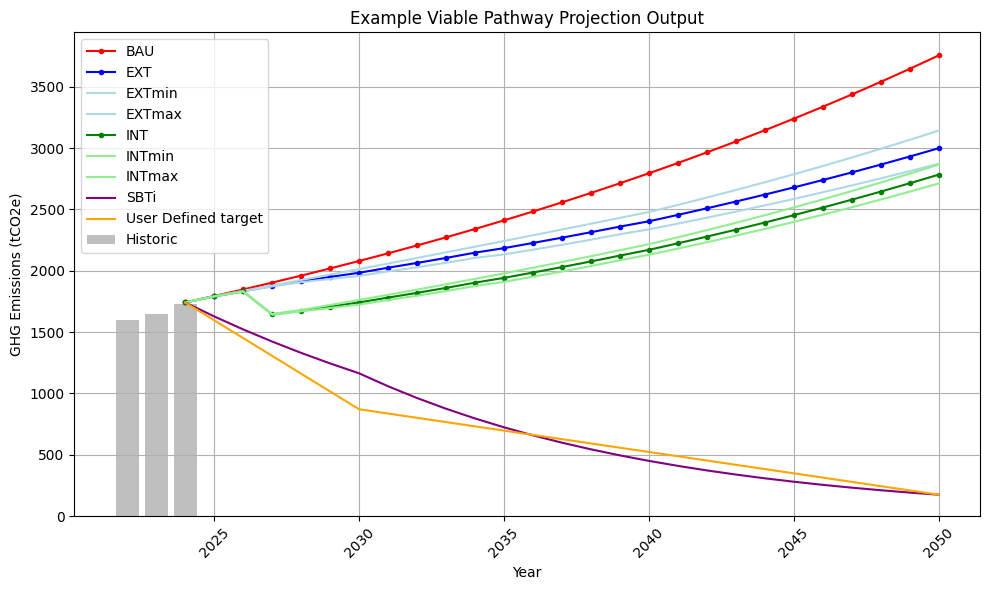

In [230]:
# First install matplotlib using pip if not already installed
%pip install matplotlib

import matplotlib.pyplot as plt

# Extract years and emissions data
years = list(range(2024, 2051))
bauemissions = [result['ghgBAUsumperyear'][i] for i in range(len(result['ghgBAUsumperyear']))]
extemissions = [result['ghgEXTsumperyear'][i] for i in range(len(result['ghgEXTsumperyear']))]
extminemissions = [result['ghgEXTsumperyearMin'][i] for i in range(len(result['ghgEXTsumperyearMin']))]
extmaxemissions = [result['ghgEXTsumperyearMax'][i] for i in range(len(result['ghgEXTsumperyearMax']))]
intemissions = [result['ghgINTsumperyear'][i] for i in range(len(result['ghgINTsumperyear']))]
intminemissions = [result['ghgINTsumperyearMin'][i] for i in range(len(result['ghgINTsumperyearMin']))]
intmaxemissions = [result['ghgINTsumperyearMax'][i] for i in range(len(result['ghgINTsumperyearMax']))]
sbtitarget = [result['sbtiPathwayValues'][i] for i in range(len(result['sbtiPathwayValues']))]
userDefinedPathwayValues = [result['userDefinedPathwayValues'][i] for i in range(len(result['userDefinedPathwayValues']))]


# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(years, bauemissions, marker='.', label='BAU', color='red')
plt.plot(years, extemissions, marker='.', label='EXT', color='blue') 
plt.plot(years, extminemissions, marker='', label='EXTmin', color='lightblue')
plt.plot(years, extmaxemissions, marker='', label='EXTmax', color='lightblue')
plt.plot(years, intemissions, marker='.', label='INT', color='green')
plt.plot(years, intminemissions, marker='', label='INTmin', color='lightgreen')
plt.plot(years, intmaxemissions, marker='', label='INTmax', color='lightgreen')
plt.plot(years, sbtitarget, marker='', label='SBTi', color='purple')
plt.plot(years, userDefinedPathwayValues, marker='', label='User Defined target', color='orange')


# Add historic emissions as bar chart
# Get minimum year from historic emissions
min_historic_year = min(int(year) for year in HISTORIC_EMISSIONS.keys() if year != "emissionsunit")
historic_years = list(range(min_historic_year, 2025))
historic_emissions = []

for year in historic_years:
    year_str = str(year)
    if year_str in HISTORIC_EMISSIONS:
        # Sum up scope 1, 2 and 3 emissions for the year
        total = (HISTORIC_EMISSIONS[year_str].get('1', 0) + 
                HISTORIC_EMISSIONS[year_str].get('2', 0) + 
                HISTORIC_EMISSIONS[year_str].get('3', 0))/1000
        historic_emissions.append(total)
    else:
        historic_emissions.append(0)

plt.bar(historic_years, historic_emissions, label='Historic', color='gray', alpha=0.5)


# Add legend
plt.legend()

# Customize the plot
plt.title('Example Viable Pathway Projection Output')
plt.xlabel('Year')
plt.ylabel('GHG Emissions (tCO2e)')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()
